<a href="https://colab.research.google.com/github/yhoutempus98/course-material/blob/main/BigQuery_bquxjob_2ddb75cc_18b86a6eaee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'tl-m2lipiwp693inikwisyy' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=tl-m2lipiwp693inikwisyy:US:bquxjob_2ddb75cc_18b86a6eaee)
back to BigQuery to edit the query within the BigQuery user interface.

In [ ]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_cf68c3c_18b8b45de8b') # Job ID inserted based on the query results selected to explore
print(job.query)


SELECT
  cohort_name,
  patient_count,
  TIMESTAMP_DIFF(dag_end_datetime, dag_start_datetime, MINUTE) as dag_duration_mins,
  destination,
  file_types,
  status,
  num_files,
  delivery_size_gb
FROM
  `tl-m2lipiwp693inikwisyy.delivery_manager.individual_file_deliveries` indiv_del
JOIN
  `tl-m2lipiwp693inikwisyy.delivery_manager.airflow_runs` airflow
ON
  airflow.conf_INDIVIDUAL_FILE_DELIVERY_ID = indiv_del.individual_file_delivery_id
-- WHERE
--   indiv_del.STATUS='COMPLETE'
ORDER BY
  indiv_del.created_datetime desc
  


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [ ]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_cf68c3c_18b8b45de8b') # Job ID inserted based on the query results selected to explore
df_group = job.to_dataframe()
job = client.get_job('bquxjob_6fed71d8_18b8b8f5436') # Job ID inserted based on the query results selected to explore
df_indiv = job.to_dataframe()

## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


In [ ]:
print(df_group.isnull().sum())
# df.isnull().values.any()
df_group_nona = df_group.dropna()

print(df_indiv.isnull().sum())
df_indiv_nona = df_indiv.dropna()

cohort_name            0
patient_count          0
dag_duration_mins      0
destination            0
status                 0
num_files            101
delivery_size_gb     101
dtype: int64
cohort_name           0
patient_count         0
dag_duration_mins     0
destination           0
file_types            0
status                0
num_files            56
delivery_size_gb     56
dtype: int64


In [ ]:
df_indiv[["patient_count", "delivery_size_gb", "dag_duration_mins","num_files"]].corr()["dag_duration_mins"]


patient_count       -0.002725
delivery_size_gb     0.151115
dag_duration_mins    1.000000
num_files            0.154127
Name: dag_duration_mins, dtype: float64

In [ ]:
X = df_group_nona[['patient_count', 'delivery_size_gb']]
y = df_group_nona['dag_duration_mins']
# X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

# coefficients = model.coef_
# intercept = model.intercept_


0.7122703346294317
[ 0.42752675 -0.42030433]
-3.9881227755945616


In [ ]:
X = df_indiv_nona[['patient_count', 'delivery_size_gb','num_files']]
y = df_indiv_nona['dag_duration_mins']
# X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X, y)
print(model.score(X, y))
print(model.coef_)
print(model.intercept_)

0.02841995819638632
[ 0.01290808  0.00228315 -0.00228834]
342.59403065852536


In [ ]:
['patient_count', 'num_files','delivery_size_gb']
print(coefficients)
print(intercept)

NameError: ignored

In [ ]:
X = dfresult[['patient_count', 'delivery_size_gb']]
y = dfresult['dag_duration_mins']
model = LinearRegression()
model.fit(X, y)
coefficients = model.coef_
intercept = model.intercept_

In [ ]:
print(coefficients)
print(intercept)

[ 0.42752675 -0.42030433]
-3.9881227755945616


In [ ]:
pip install matplotlib seaborn pandas

<ipython-input-22-f5fd96f81aa3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_group_nona.corr()


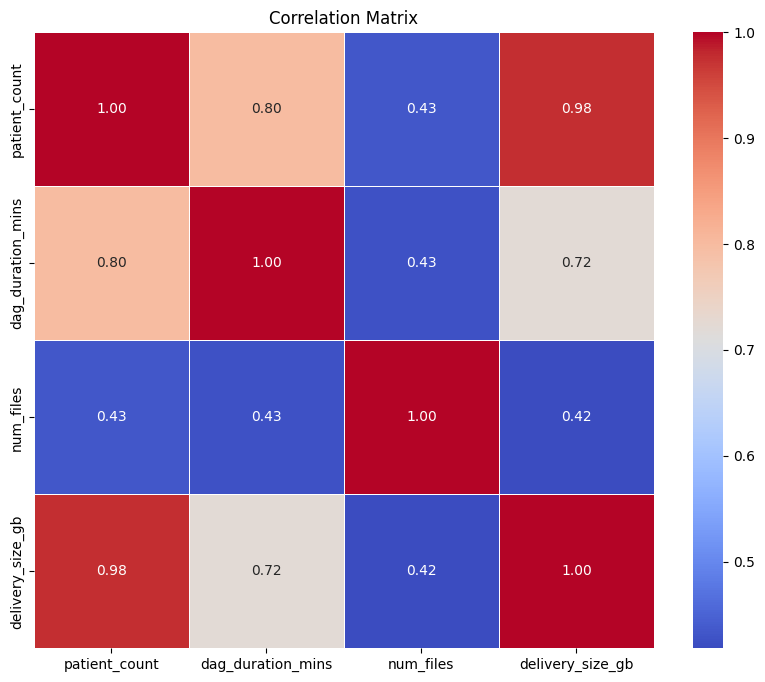

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
correlation_matrix = df_group_nona.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-24-4a562d7f5f63>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_indiv.corr()


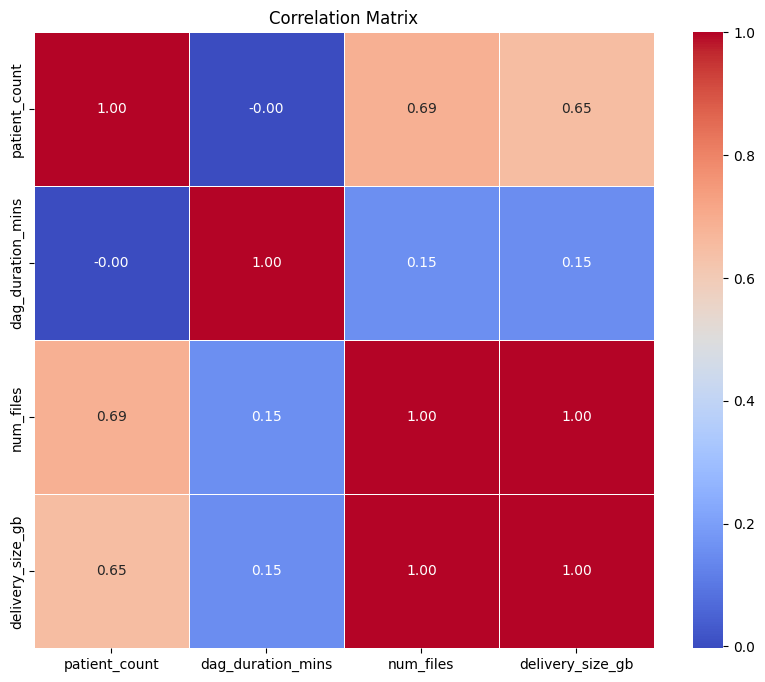

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
# df_indiv[["patient_count", "delivery_size_gb", "dag_duration_mins","num_files"]].corr()["dag_duration_mins"]
correlation_matrix = df_indiv_nona.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()